<a href="https://colab.research.google.com/github/hiya906/my-machine-learning/blob/master/%EC%98%81%ED%99%94%EC%9E%A5%EB%A5%B4%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Google Drive Mount

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

## 2. Data Load
- gdrive에서 데이터 불러오기
- 데이터 개수 파악하기

In [1]:
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# train = pd.read_csv('content/gdrive/MyDrive/Samsung_SDS_S2/Random Forest/train.csv')
# test = pd.read_csv('content/gdrive/MyDrive/Samsung_SDS_S2/Random Forest/test.csv')

train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')

print(train)

                                title  ...                                               plot
0                   This Land Is Mine  ...  Albert is an unmarried schoolmaster living wit...
1                     Head Over Heels  ...  Charles Richardson is a civil servant in his e...
2                 Twice in a Lifetime  ...  Harry Mackenzie works in a factory by day, and...
3                                Next  ...  Cris Johnson (Nicolas Cage) can see into his f...
4                       Desert Nights  ...  A gang of thieves rob an African diamond compa...
5                                 Oy!  ...  Uday (Siddharth), is a rich kid who becomes ch...
6               The Missouri Traveler  ...  Brandon deWilde leads a cast lengthy in charac...
7                                Bang  ...  Bang is a story about an unnamed young woman l...
8                              Gifted  ...  In a small town near Tampa, Florida, seven-yea...
9              Phantom of the Theatre  ...  A haunted theatr

In [2]:
# 데이터 개수 확인하기
import numpy as np
a = train["genre"].to_list()
index, count = np.unique(a, return_counts=True)
print(index)
print(count)

b = test["genre"].to_list()
index, count = np.unique(b, return_counts=True)
print(index)
print(count)

['comedy' 'drama' 'science fiction' 'thriller' 'war']
[3919 5384  382  881  234]
['comedy' 'drama' 'science fiction' 'thriller' 'war']
[460 580  36  85  39]


## 3. 데이터 시각화하기

(10800,)


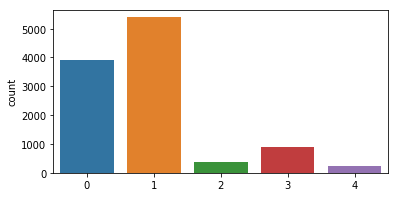

In [37]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

le = preprocessing.LabelEncoder()
genre_num = le.fit_transform(train["genre"]) # Label에 자동으로 알아서 번호 매겨줌
print(genre_num.shape)

fig, e = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(genre_num)

## 4. WordCloud

In [4]:
train.head()

,title,genre,plot
0,This Land Is Mine,drama,Albert is an unmarried schoolmaster living wit...
1,Head Over Heels,drama,Charles Richardson is a civil servant in his e...
2,Twice in a Lifetime,drama,"Harry Mackenzie works in a factory by day, and..."
3,Next,science fiction,Cris Johnson (Nicolas Cage) can see into his f...
4,Desert Nights,drama,A gang of thieves rob an African diamond compa...


In [5]:
train_length = train["plot"].apply(len)

print('시나리오 길이 최대값: {}'.format(np.max(train_length)))
print('시나리오 길이 평균값: {}'.format(np.mean(train_length)))
print('시나리오 길이 표준편차: {}'.format(np.std(train_length)))
print('시나리오 길이 중간값: {}'.format(np.median(train_length)))
print('시나리오 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('시나리오 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

시나리오 길이 최대값: 29442
시나리오 길이 평균값: 2070.448148148148
시나리오 길이 표준편차: 1723.7387255550195
시나리오 길이 중간값: 1588.0
시나리오 길이 제1사분위: 672.0
시나리오 길이 제3사분위: 3223.25


(-0.5, 799.5, 599.5, -0.5)

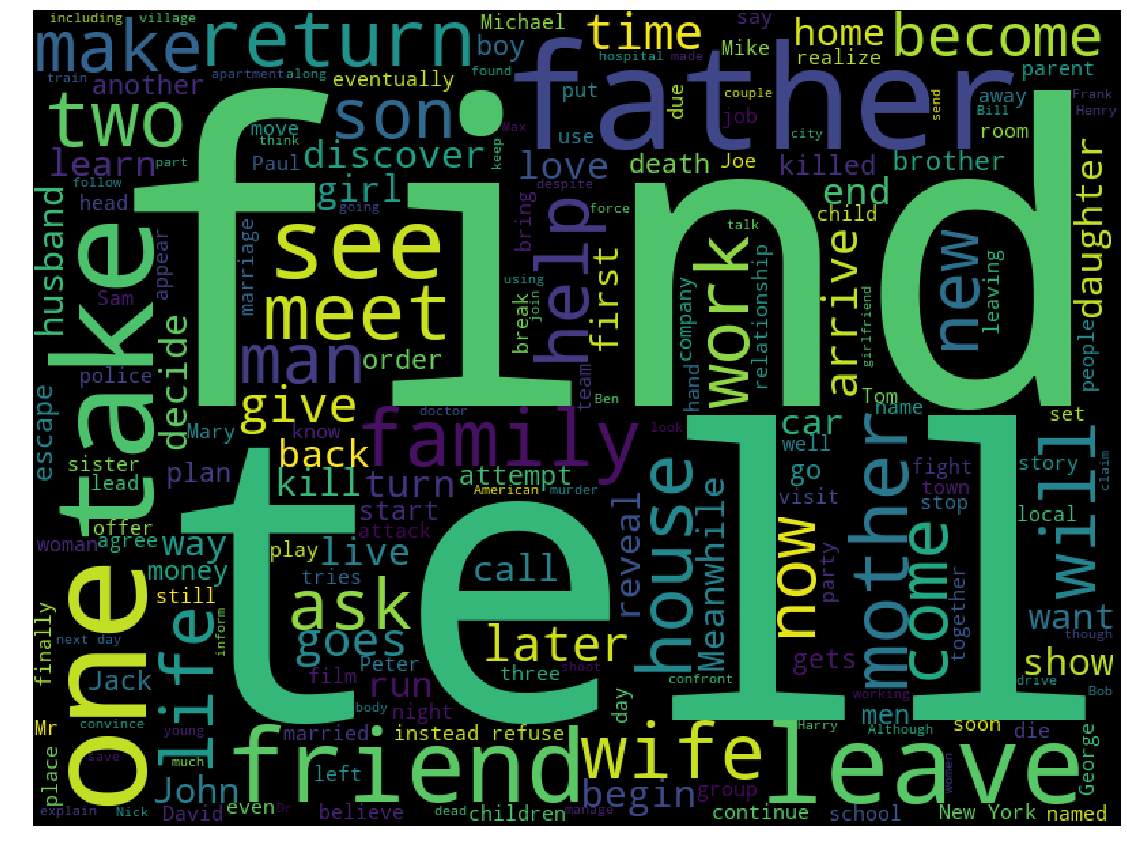

In [6]:
cloud = WordCloud(width=800, height=600).generate(" ".join(train["plot"].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probability')

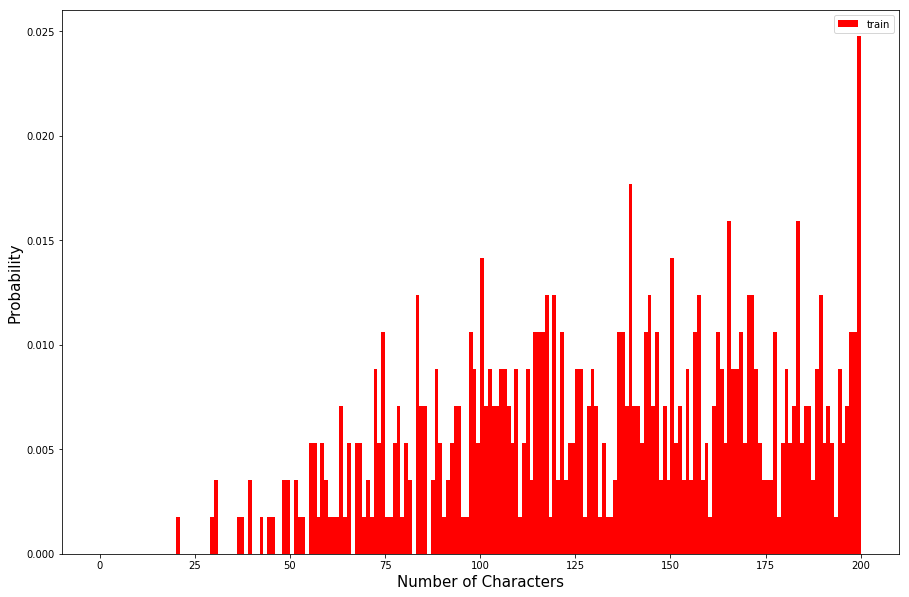

In [6]:
train_length = train["plot"].apply(len)
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', normed=True, label='train')
plt.legend()
plt.xlabel('Number of Characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)


## 5. CountVectorizer 적용
1. 문서를 토큰 리스트로 변환한다.
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
corpus = train["plot"]
X = vect.fit_transform(corpus).toarray()
Y = np.array(train["genre"])
clf = RandomForestClassifier()
clf.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
print(X)
print(Y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10800,)


In [44]:
print(X.shape)
print(vect.transform(test["plot"]).toarray().shape)

(10800, 72724)
(1200, 72724)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
result = clf.predict(vect.transform(test["plot"]).toarray())
output= pd.DataFrame(data = {"title":test["title"], "genre": result})


In [24]:
print(output)

                                                  title   genre
0                                 The Kid from Brooklyn   drama
1                                    The Quiet American  comedy
2                                           Ladies' Day  comedy
3                                    That'll Be The Day   drama
4                                            Long Pants   drama
5                                              Clearcut   drama
6                               A River Runs Through It   drama
7                                        Always a Bride   drama
8                                       Prince of Foxes   drama
9                                        Beyond Therapy  comedy
10                                        The Satan Bug   drama
11                                The Old Swimmin' Hole   drama
12                                        The Wolf Song   drama
13                                   Campus Confessions   drama
14                                      

## 평가하기(Evaluation)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

real_value = np.array(test["genre"])
predict_value = result

acc = accuracy_score(real_value, predict_value)
print(classification_report(real_value, predict_value))
print("accuracy = ", acc)

                 precision    recall  f1-score   support

         comedy       0.56      0.51      0.53       460
          drama       0.57      0.76      0.65       580
science fiction       0.60      0.08      0.15        36
       thriller       0.00      0.00      0.00        85
            war       1.00      0.03      0.05        39

       accuracy                           0.56      1200
      macro avg       0.55      0.28      0.28      1200
   weighted avg       0.54      0.56      0.52      1200

accuracy =  0.5641666666666667
